In [2]:
#data preparation 

In [3]:
#import standard stats table for the Top5 European 
#football for 2024/25 season
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
import numpy as np
dataset_standard = pd.read_csv("fbref_big5_stats_24_25.csv")
print(dataset_standard)

        Rk             Player   Nation    Pos        Squad  \
0        1         Max Aarons  eng ENG     DF  Bournemouth   
1        2         Max Aarons  eng ENG  DF,MF     Valencia   
2        3     Rodrigo Abajas   es ESP     DF     Valencia   
3        4     James Abankwah   ie IRL  DF,MF      Udinese   
4        5  Keyliane Abdallah   fr FRA     FW    Marseille   
...    ...                ...      ...    ...          ...   
2849  2850       Edhy Zuliani   fr FRA     DF     Toulouse   
2850  2851   Szymon Żurkowski   pl POL     MF       Empoli   
2851  2852    Martin Ødegaard   no NOR     MF      Arsenal   
2852  2853        Milan Đurić   ba BIH     FW        Monza   
2853  2854        Milan Đurić   ba BIH     FW        Parma   

                    Comp   Age    Born  MP  Starts  ...  Gls.1  Ast.1  G+A.1  \
0     eng Premier League  24.0  2000.0   3       1  ...   0.00   0.00   0.00   
1             es La Liga  24.0  2000.0   4       1  ...   0.00   0.00   0.00   
2             e

In [4]:
#rename columns in standard stats table to easy to undertand words using Fbref glossary 
rename_columns = {
"Rk": "Rank",
    "Nation": "Nationality",
    "Pos": "Position",
    "Comp": "Competition",
    "Age": "Age",
    "Born": "Birth_Year",
    
    # Playing Time
    "MP": "Matches_Played",
    "Starts": "Games_Started",
    "Min": "Minutes",
    "90s": "90s_Played",
    
    # Performance (Volume)
    "Gls": "Goals",
    "Ast": "Assists",
    "G+A": "Goals_Plus_Assists",
    "G-PK": "Non_Penalty_Goals",
    "PK": "Penalties_Made",
    "PKatt": "Penalties_Attempted",
    "CrdY": "Yellow_Cards",
    "CrdR": "Red_Cards",
    
    # Expected Metrics
    "xG": "Expected_Goals",
    "npxG": "Non_Penalty_xG",
    "xAG": "Exp_Assisted_Goals",
    "npxG+xAG": "Non_Penalty_xG_Plus_xAG",
    
    # Progression
    "PrgC": "Progressive_Carries",
    "PrgP": "Progressive_Passes",
    "PrgR": "Progressive_Passes_Received",

    #Stats PER 90
    "Gls.1": "Goals_Per_90",
    "Ast.1": "Assists_Per_90",
    "G+A.1": "Goals_Plus_Assists_Per_90",
    "G-PK.1": "Non_Penalty_Goals_Per_90",
    "G+A-PK": "Non_Penalty_Goals_Plus_Assists_Per_90",
    "xG.1": "Expected_Goals_Per_90",
    "xAG.1": "Exp_Assisted_Goals_Per_90",
    "xG+xAG": "Exp_Goals_Plus_Exp_Assists_Per_90",     
    "npxG.1": "Non_Penalty_xG_Per_90",
    "npxG+xAG.1": "Non_Penalty_xG_Plus_Exp_Assists_Per_90",

}
dataset_standard = dataset_standard.rename(columns=rename_columns)



In [5]:
# feature engineering – per-90 stats 
# add missing per-90 progressive stats
dataset_standard['Progressive_Carries_90'] = dataset_standard['Progressive_Carries'] / dataset_standard['90s_Played']
dataset_standard['Progressive_Passes_90'] = dataset_standard['Progressive_Passes'] / dataset_standard['90s_Played']
dataset_standard['Progressive_Passes_Received_90'] = dataset_standard['Progressive_Passes_Received'] / dataset_standard['90s_Played']
dataset_standard['Yellow_Cards_90'] = dataset_standard['Yellow_Cards'] / dataset_standard['90s_Played']
dataset_standard['Red_Cards_90'] = dataset_standard['Red_Cards'] / dataset_standard['90s_Played']


In [6]:
#import defense stats table for the Top5 European 
#football for 2024/25 season
dataset_defense = pd.read_csv("fbref_big5_stats_24_25_def.csv")
print(dataset_defense)

        Rk             Player   Nation    Pos        Squad  \
0        1         Max Aarons  eng ENG     DF  Bournemouth   
1        2         Max Aarons  eng ENG  DF,MF     Valencia   
2        3     Rodrigo Abajas   es ESP     DF     Valencia   
3        4     James Abankwah   ie IRL  DF,MF      Udinese   
4        5  Keyliane Abdallah   fr FRA     FW    Marseille   
...    ...                ...      ...    ...          ...   
2849  2850       Edhy Zuliani   fr FRA     DF     Toulouse   
2850  2851   Szymon Żurkowski   pl POL     MF       Empoli   
2851  2852    Martin Ødegaard   no NOR     MF      Arsenal   
2852  2853        Milan Đurić   ba BIH     FW        Monza   
2853  2854        Milan Đurić   ba BIH     FW        Parma   

                    Comp   Age    Born   90s  Tkl  ...  Att   Tkl%  Lost  \
0     eng Premier League  24.0  2000.0   1.0    2  ...    1  100.0     0   
1             es La Liga  24.0  2000.0   1.3    4  ...    5   80.0     1   
2             es La Liga  2

In [7]:
#rename columns in defense stats table to easy to undertand words using Fbref glossary 

rename_defensive_columns = {
    "Rk": "Rank",
    "Nation": "Nationality",
    "Pos": "Position",
    "Comp": "Competition",
    "Age": "Age",
    "Born": "Birth_Year",
    "90s": "90s_Played",

    # Tackles
    "Tkl": "Tackles",             
    "TklW": "Tackles_Won",          
    "Def 3rd": "Tackles_Def_3rd", 
    "Mid 3rd": "Tackles_Mid_3rd", 
    "Att 3rd": "Tackles_Att_3rd", 

    # Challenges 
    "Tkl.1": "Dribblers_Tackled", 
    "Att": "Dribbles_Challenged",
    "Tkl%": "%_Dribblers_Tackled",
    "Lost": "Challenges_Lost",      

    # Blocks
    "Blocks": "Blocks",             
    "Sh": "Shots_Blocked",
    "Pass": "Passes_Blocked",

    # Interceptions, Clearances, Errors
    "Int": "Interceptions",
    "Tkl+Int": "Tackles_Plus_Interceptions",
    "Clr": "Clearances",
    "Err": "Errors_Leading_To_Shot"
}

dataset_defense = dataset_defense.rename(columns=rename_defensive_columns)



In [8]:
#convert columns in the defense dataset to per90 
defensive_stats_per90 = [
    'Tackles',
    'Tackles_Won',
    'Tackles_Def_3rd',
    'Tackles_Mid_3rd',
    'Tackles_Att_3rd',
    'Dribblers_Tackled',
    'Dribbles_Challenged',
    'Challenges_Lost',
    'Blocks',
    'Shots_Blocked',
    'Passes_Blocked',
    'Interceptions',
    'Tackles_Plus_Interceptions',
    'Clearances',
    'Errors_Leading_To_Shot'
]

for col in defensive_stats_per90:
    new_col_name = f"{col}_Per_90"
    dataset_defense[new_col_name] = dataset_defense[col] / dataset_defense['90s_Played']
    
    #replace NaNS with zero for players with zero minutes played
    dataset_defense[new_col_name] = dataset_defense[new_col_name].fillna(0)


In [9]:
#create a merged dataset of standard stats with defense stats table
cols_to_merge = ['Player', 'Squad'] + [col for col in dataset_defense.columns if '_Per_90' in col]

main_dataset = pd.merge(dataset_standard, dataset_defense[cols_to_merge], 
on=['Player', 'Squad'], how='inner')

print(main_dataset)

      Rank             Player Nationality Position        Squad  \
0        1         Max Aarons     eng ENG       DF  Bournemouth   
1        2         Max Aarons     eng ENG    DF,MF     Valencia   
2        3     Rodrigo Abajas      es ESP       DF     Valencia   
3        4     James Abankwah      ie IRL    DF,MF      Udinese   
4        5  Keyliane Abdallah      fr FRA       FW    Marseille   
...    ...                ...         ...      ...          ...   
2849  2850       Edhy Zuliani      fr FRA       DF     Toulouse   
2850  2851   Szymon Żurkowski      pl POL       MF       Empoli   
2851  2852    Martin Ødegaard      no NOR       MF      Arsenal   
2852  2853        Milan Đurić      ba BIH       FW        Monza   
2853  2854        Milan Đurić      ba BIH       FW        Parma   

             Competition   Age  Birth_Year  Matches_Played  Games_Started  \
0     eng Premier League  24.0      2000.0               3              1   
1             es La Liga  24.0      2000.

In [10]:
#keep only players with ≥450 minutes (≥5 full games)
main_dataset = main_dataset[main_dataset['Minutes'] >= 450].copy()

#remove players who appear multiple times (transfers/loans)
main_dataset = main_dataset.loc[main_dataset.groupby('Player')['Minutes'].idxmax()].reset_index(drop=True)

#remove goalkeepers
main_dataset = main_dataset[main_dataset['Position'] != 'GK'].copy()

#drop rows with NaN values
main_dataset = main_dataset.dropna()

# check for NaNs
check_nans = main_dataset.isna().sum().sum()

print(f"NaNs found: {check_nans}")
print(f"Final dataset: {len(main_dataset)} regular players")

NaNs found: 0
Final dataset: 1793 regular players


In [11]:
#extract FBref's official primary position (first in list)
main_dataset['Main_Position'] = main_dataset['Position'].str.split(',').str[0]

#keep only outfield positions we want to classify
main_dataset = main_dataset[main_dataset['Main_Position'].isin(['DF', 'MF', 'FW'])].copy()

print(f"Final clean dataset: {len(main_dataset)} outfield regulars")
print("\nPosition distribution (primary role):")
print(main_dataset['Main_Position'].value_counts())

Final clean dataset: 1793 outfield regulars

Position distribution (primary role):
Main_Position
DF    745
MF    600
FW    448
Name: count, dtype: int64


In [12]:
#Feature Selection & Scaling

In [13]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

features = [
    'Goals_Per_90',                
    'Expected_Goals_Per_90',       
    'Assists_Per_90',              
    'Exp_Assisted_Goals_Per_90',   
    'Progressive_Passes_90',       
    'Progressive_Carries_90',      
    'Progressive_Passes_Received_90', 
    'Tackles_Won_Per_90',          
    'Interceptions_Per_90',        
    'Blocks_Per_90',               
    'Clearances_Per_90',           
    'Yellow_Cards_90',             
    'Age'                          
]

X = main_dataset[features].values
y = main_dataset['Main_Position'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

position_encoder = LabelEncoder()
y_encoded = position_encoder.fit_transform(y)

print("Unique type of players found:",position_encoder.classes_)
print("X shape:", X.shape) 

Unique type of players found: ['DF' 'FW' 'MF']
X shape: (1793, 13)


In [14]:
#Train/Test Split

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [16]:
#Machine learning algorithms

In [17]:
#LogisticRegression

In [18]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)


lr_score = lr_model.score(X_test, y_test)
print(f"Logistic Regression Accuracy: {lr_score:.2%}")

Logistic Regression Accuracy: 88.30%


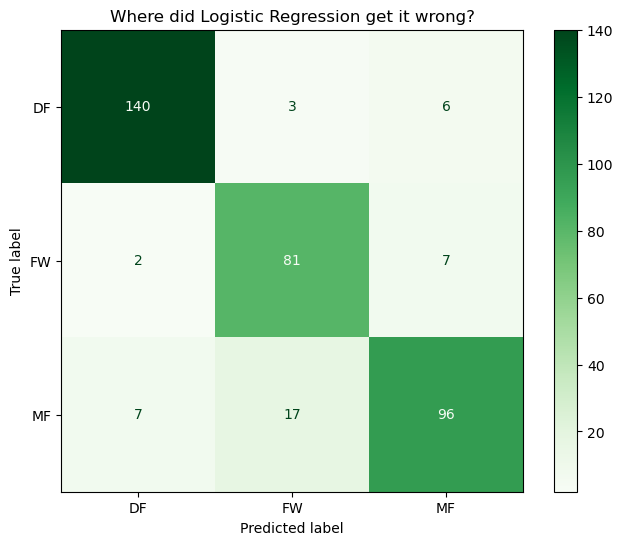

In [19]:
#plot LogisticRegression confusion matrix to know what 
#positions it misclassified
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_lr = lr_model.predict(X_test)
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=position_encoder.classes_)
disp.plot(cmap='Greens', ax=plt.gca()) 
plt.title("Where did Logistic Regression get it wrong?")

plt.show()

In [20]:
#Decision Tree

Tree Accuracy: 84.12%


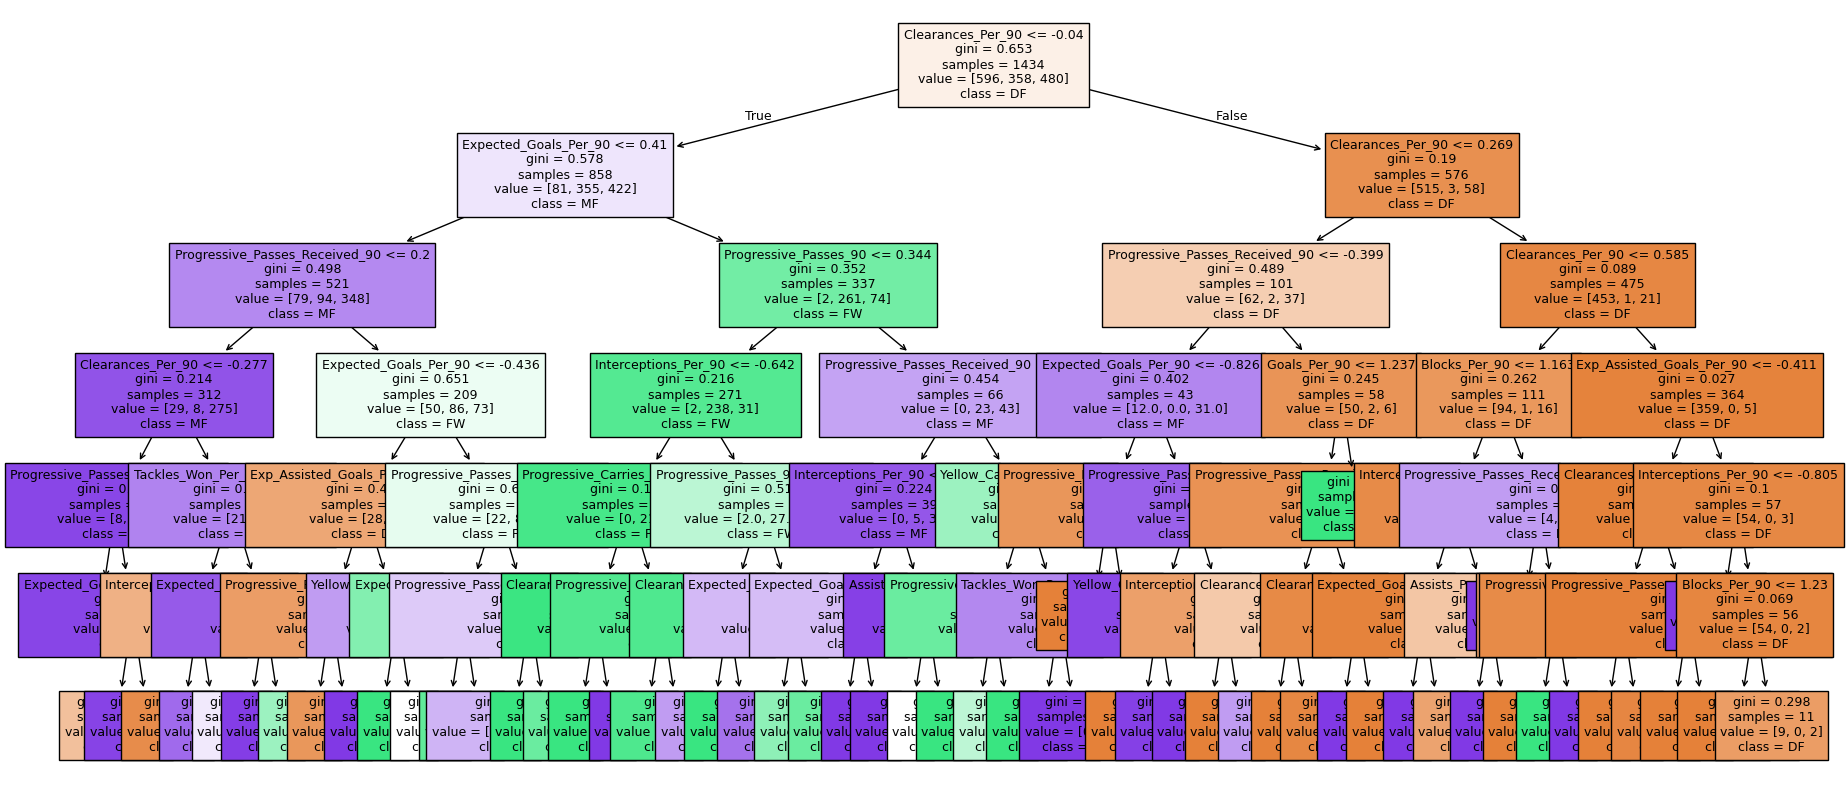

In [21]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(max_depth=6, random_state=42).fit(X_train, y_train)
decision_tree_score = accuracy_score(y_test, tree.predict(X_test))
print(f"Tree Accuracy: {decision_tree_score:.2%}")
plt.figure(figsize=(22,10))
plot_tree(tree, feature_names=features, class_names=position_encoder.classes_, filled=True, fontsize=9)
plt.show()


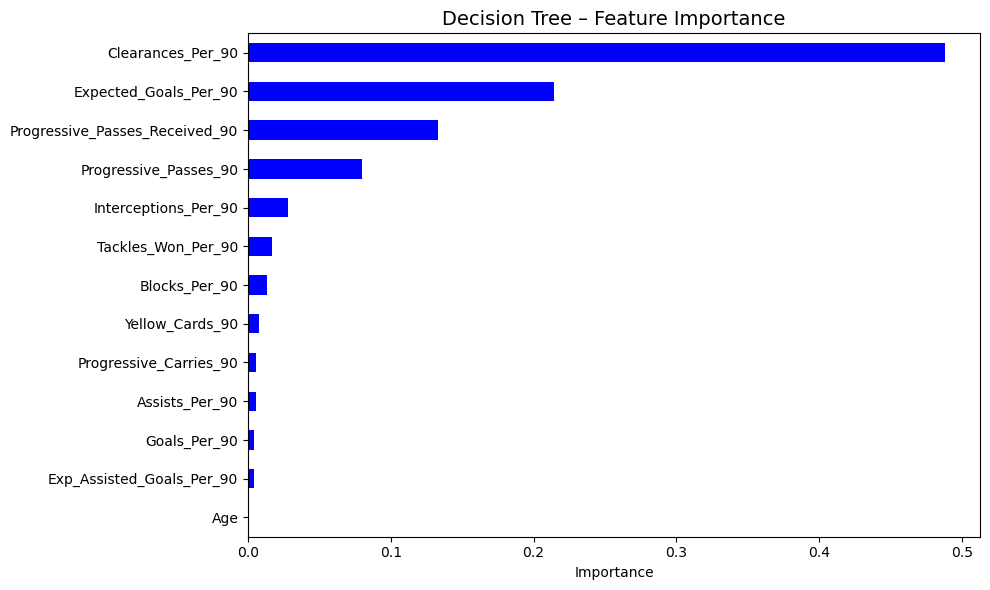

Decision tree top 4 most important features:
Clearances_Per_90                 0.488235
Expected_Goals_Per_90             0.214087
Progressive_Passes_Received_90    0.132895
Progressive_Passes_90             0.079525


In [22]:
#feature importance of the Decision Tree to see what features
#the tree used for its classifications

importances = tree.feature_importances_
feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feature_importance.plot(kind='barh', color='blue')
plt.title('Decision Tree – Feature Importance', fontsize=14)
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("Decision tree top 4 most important features:")
print(feature_importance.head(4).to_string())

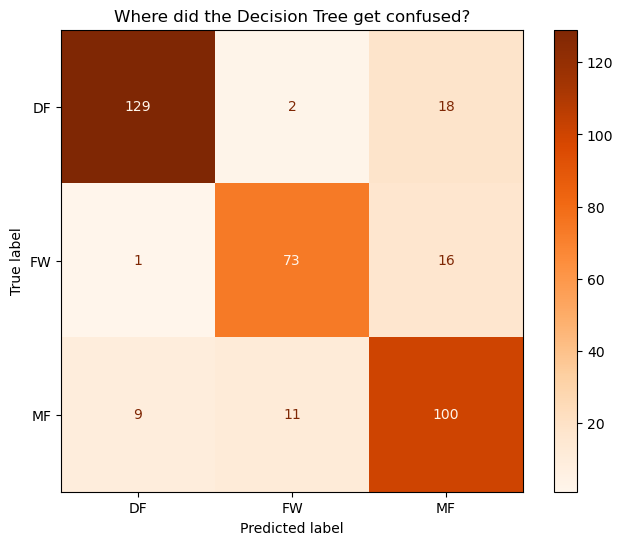

In [23]:
#plot decision tree confusion matrix  to know what 
#positions it misclassified

y_pred_tree = tree.predict(X_test)
cm_tree = confusion_matrix(y_test, y_pred_tree)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=position_encoder.classes_)
disp.plot(cmap='Oranges', ax=plt.gca())
plt.title("Where did the Decision Tree get confused?")
plt.show()

In [24]:
#SVM with RBF + GridSearch

In [25]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

svm_grid = GridSearchCV(
    SVC(kernel='rbf', random_state=42),
    {'C': [1, 10, 50, 100], 'gamma': ['scale', 0.01, 0.1]},
    cv=5, scoring='f1_macro')

svm_grid.fit(X_train, y_train)

print(f"Best params: {svm_grid.best_params_}")

svm_score = accuracy_score(y_test, svm_grid.predict(X_test))
print (f"SVM-RBF Score: {svm_score:.2%}")
                           
svm_f1_macro_score = f1_score(y_test, svm_grid.predict(X_test), average='macro')
print(f"SVM F1 Macro Score: {svm_f1_macro_score:.2%}")


Best params: {'C': 100, 'gamma': 0.01}
SVM-RBF Score: 87.47%
SVM F1 Macro Score: 86.59%


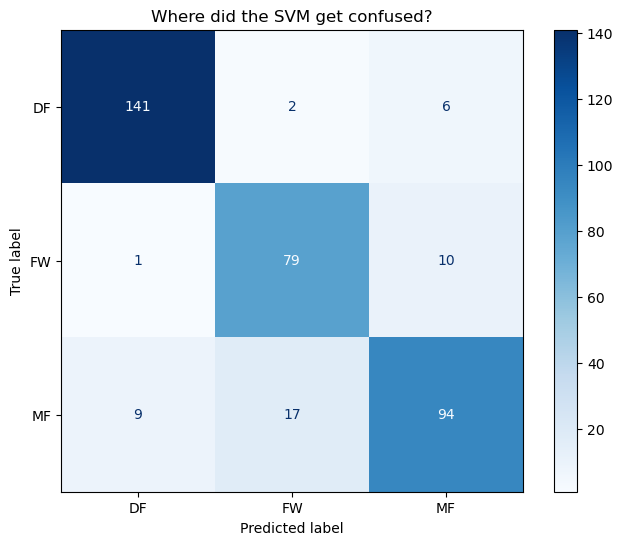

In [26]:
#plot SVM confusion matrix  to know what 
#positions it misclassified

y_pred_svm = svm_grid.predict(X_test)

cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=position_encoder.classes_)
disp.plot(cmap='Blues', ax=plt.gca())
plt.title("Where did the SVM get confused?")
plt.show()

In [27]:
print(f"Logistic Regression: {lr_score:.2%}")
print('\n')
print(f"SVM-RBF score: {svm_score:.2%}")
print(f"SVM F1 Macro Score: {svm_f1_macro_score:.2%}")
print(f"Decision Tree: {decision_tree_score:.2%}")

Logistic Regression: 88.30%


SVM-RBF score: 87.47%
SVM F1 Macro Score: 86.59%
Decision Tree: 84.12%


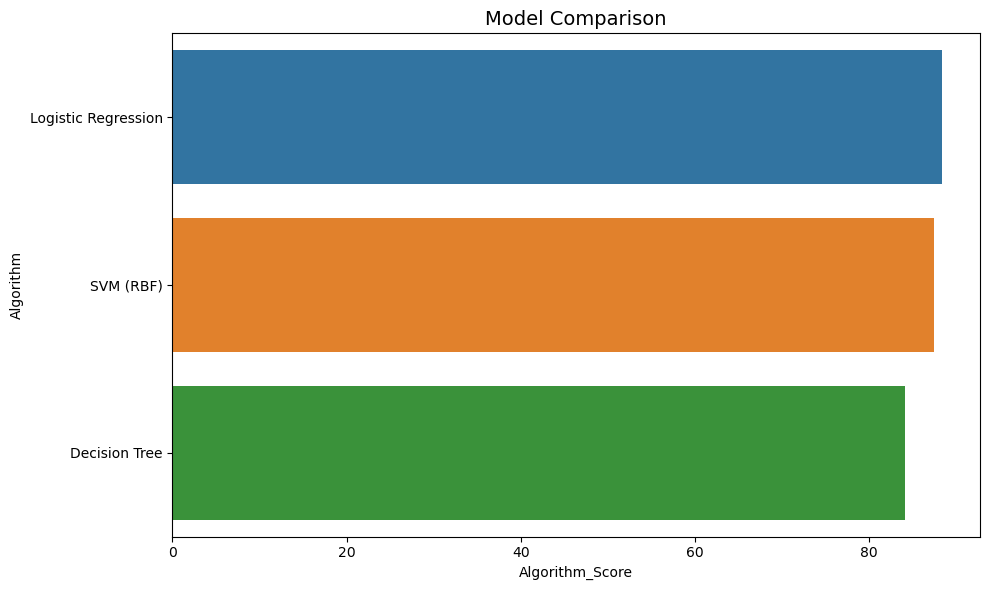

In [28]:
#plot model comparison

results = pd.DataFrame({
    'Algorithm': ['Logistic Regression', 'SVM (RBF)', 'Decision Tree'],
    'Algorithm_Score': [lr_score*100, svm_score*100, decision_tree_score*100]})

results = results.sort_values('Algorithm_Score', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='Algorithm_Score', 
    y='Algorithm', 
    hue='Algorithm', 
    data=results, 
    palette='tab10')

plt.title('Model Comparison', fontsize=14)
plt.tight_layout()
plt.show()

In [29]:
# PCA 

In [30]:
from sklearn.decomposition import PCA

#trying to know how many PCs we would need to explain most (>85%) of our variance
pca_test = PCA(n_components=0.85) 
X_pca_test = pca_test.fit_transform(X_scaled)

print(f"{pca_test.n_components_} PCs")
print(f"Explained Variance: {pca_test.explained_variance_ratio_.sum():.2%}")

7 PCs
Explained Variance: 86.15%


 7 PCs explain 86.15% of variance


<Figure size 1200x1200 with 0 Axes>

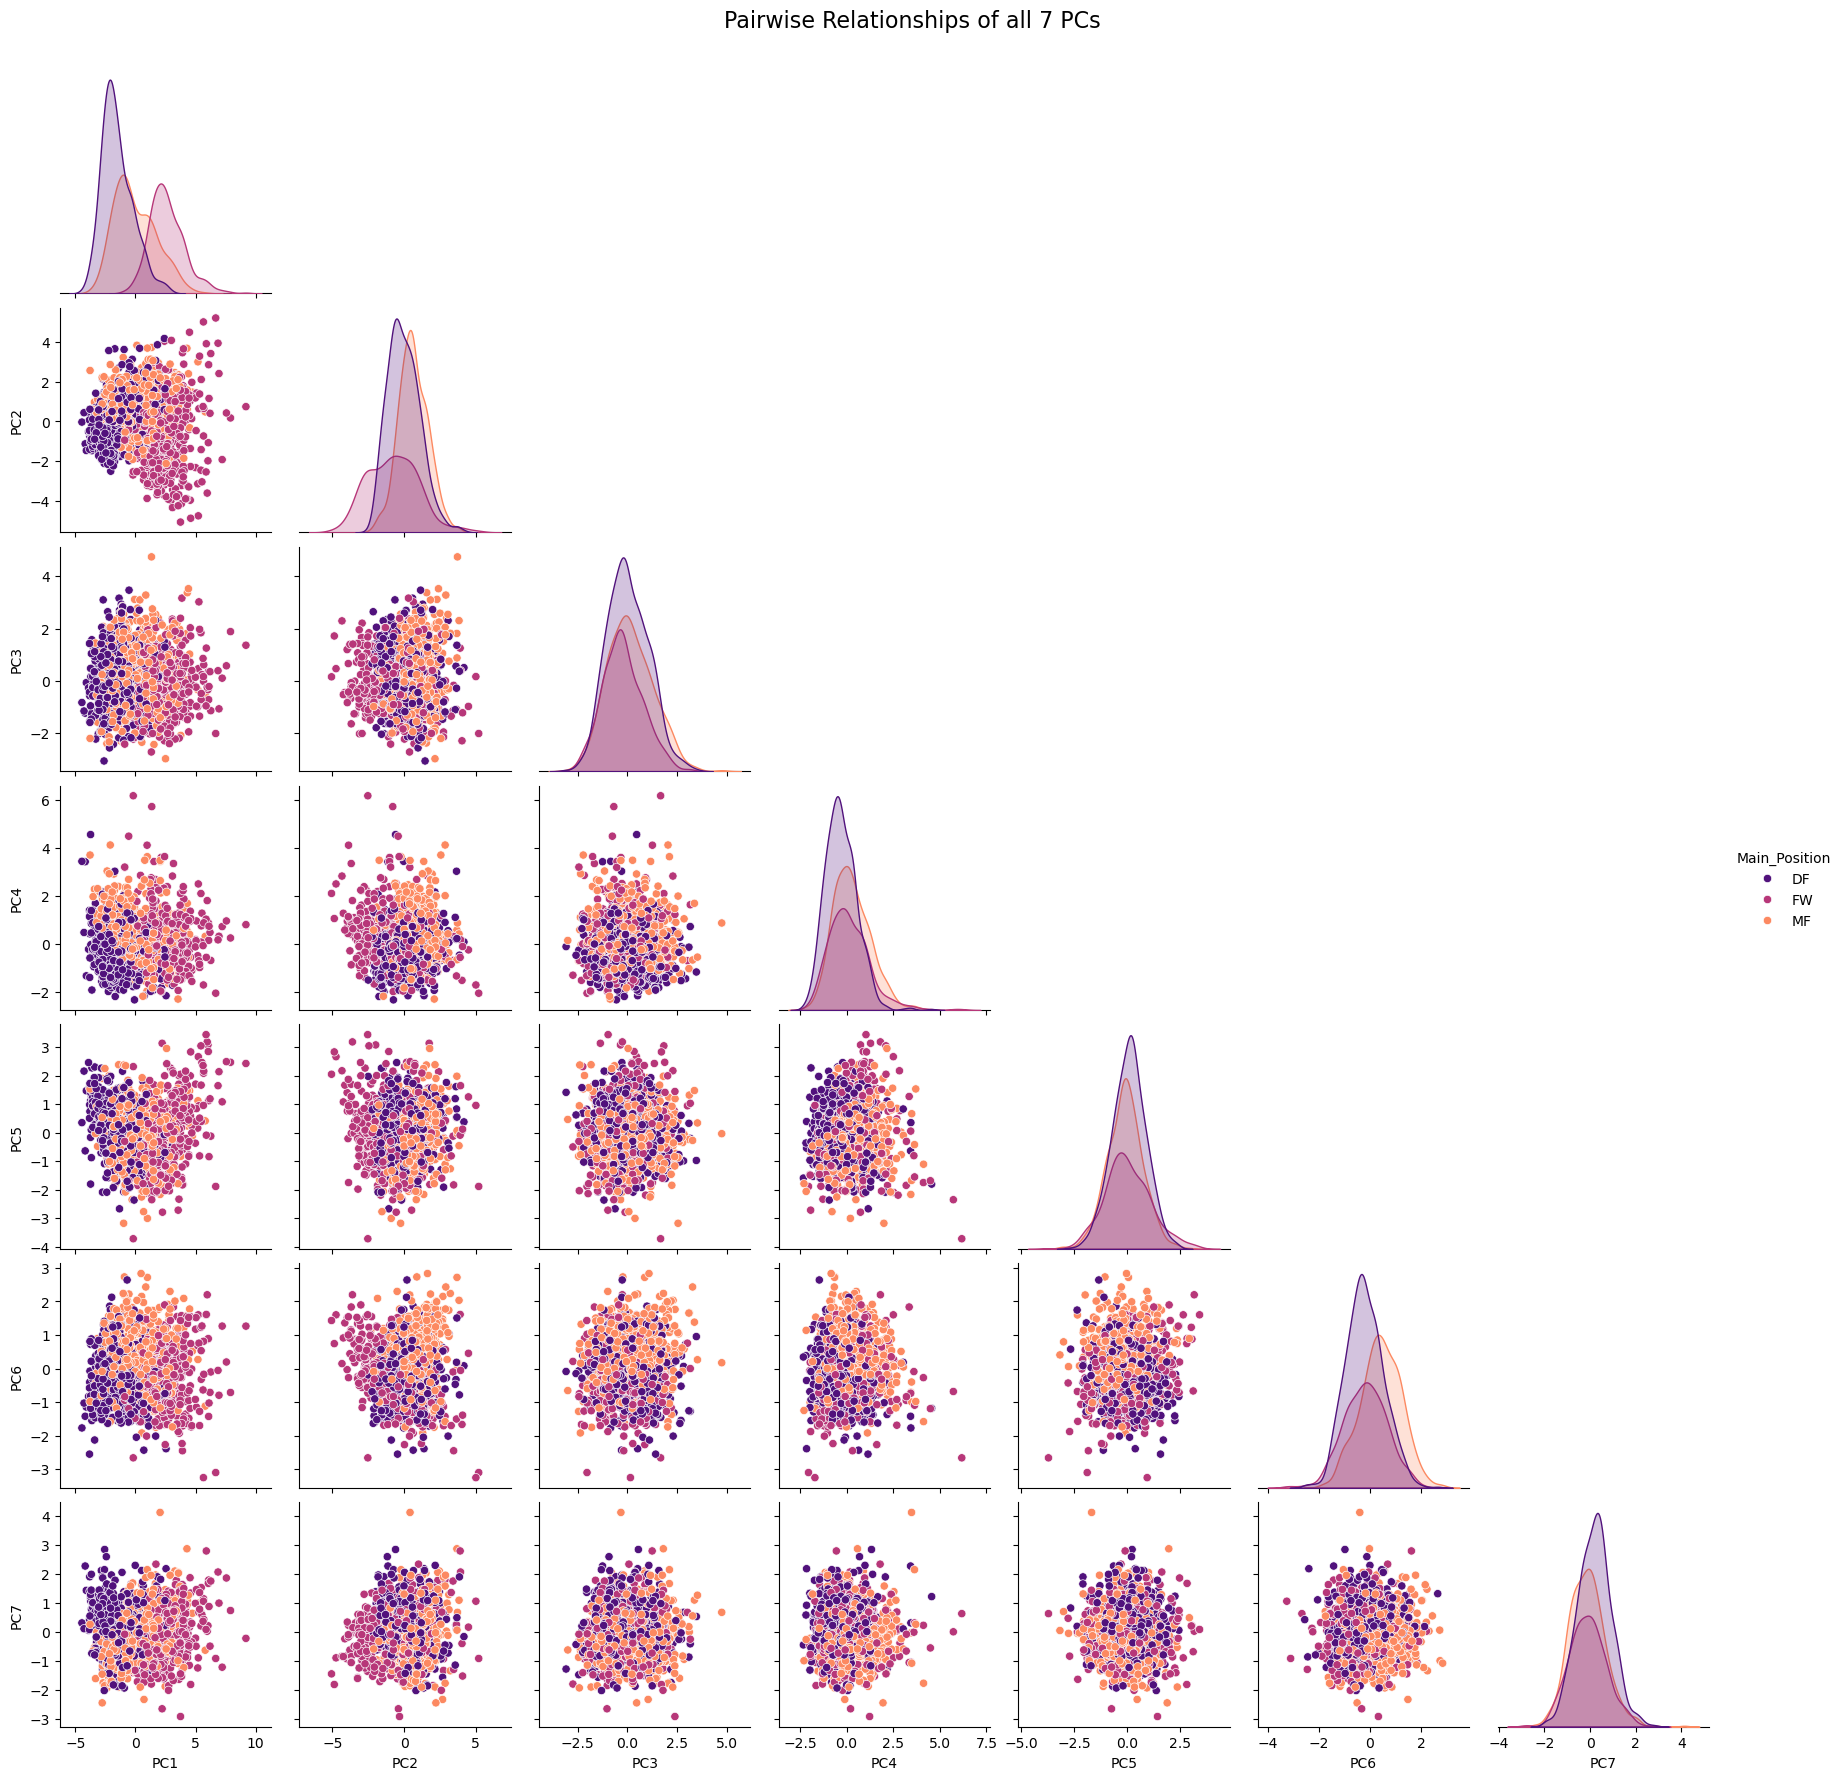

In [31]:
#plot PCs pairwise plots

pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_scaled)

print(f" {pca_test.n_components_} PCs explain {pca.explained_variance_ratio_.sum():.2%} of variance")

dataset_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

# map the encoded numbers (0, 1, 2) back to names (DF, FW, MF)
dataset_pca['Main_Position'] = [position_encoder.classes_[i] for i in y_encoded]

plt.figure(figsize=(12, 12))
sns.pairplot(dataset_pca, hue='Main_Position', palette='magma', corner=True)
plt.suptitle("Pairwise Relationships of all 7 PCs", y=1.02, fontsize=16)
plt.show()

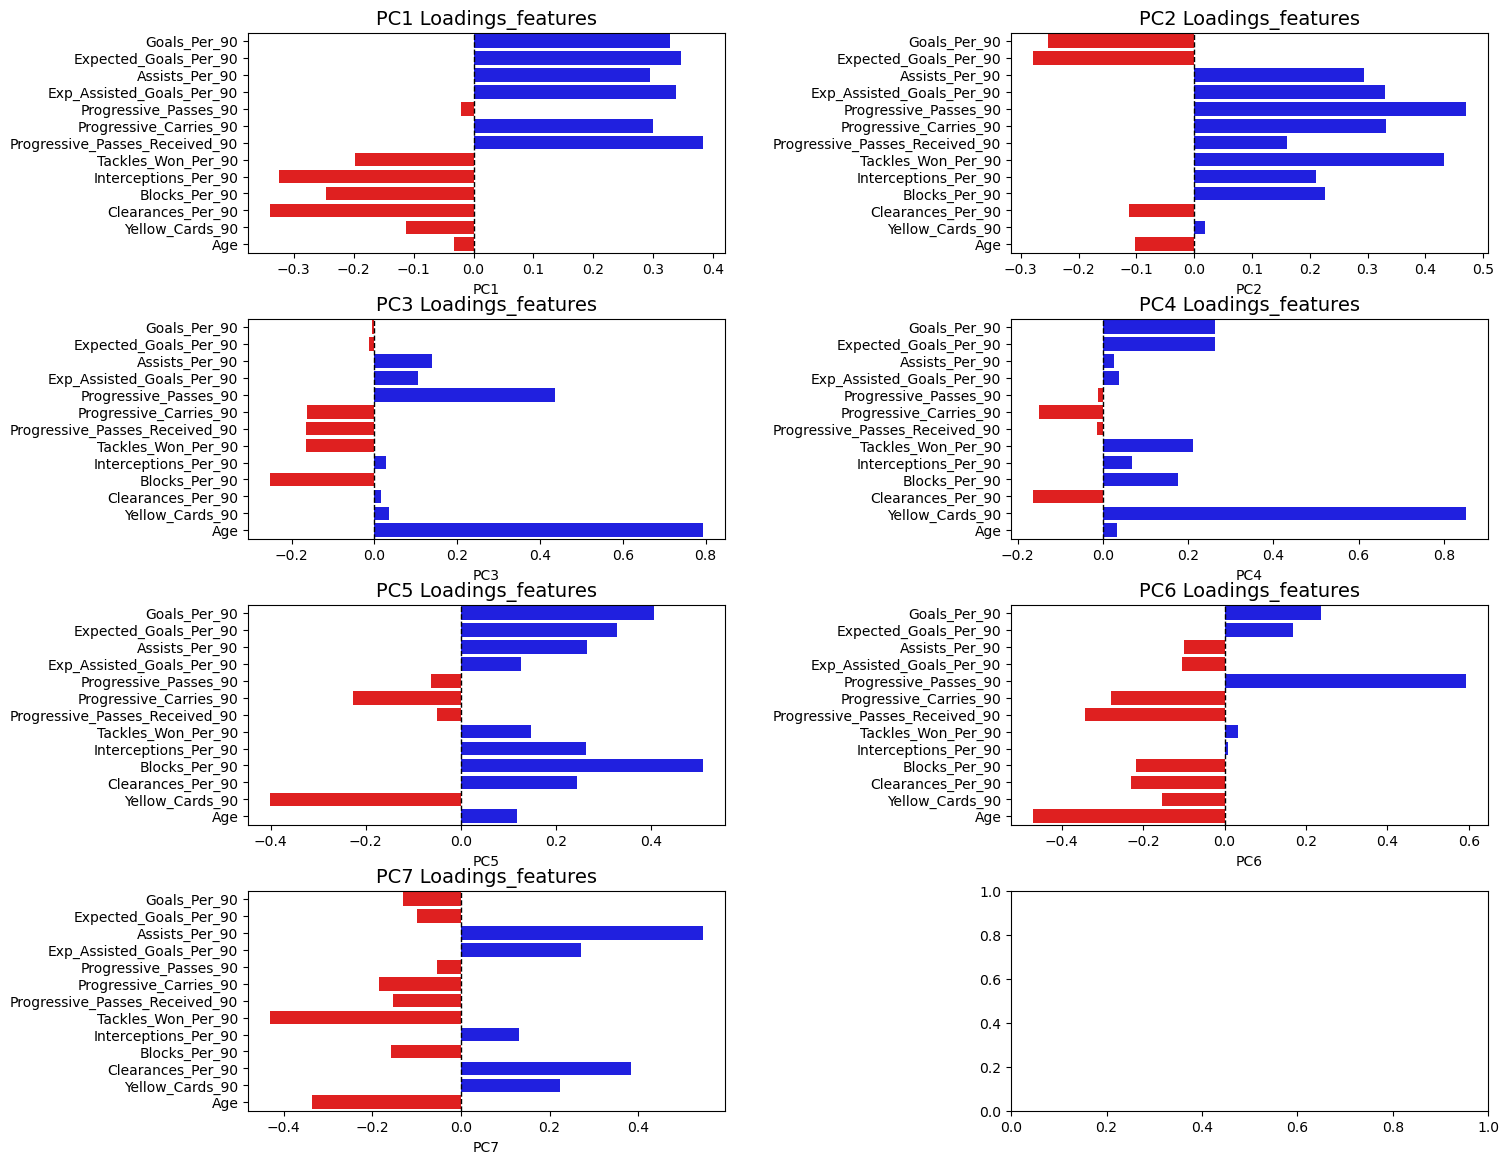

In [32]:
#plot PCs features importance to know what features drive each PCs

loadings_features = pd.DataFrame(
    pca.components_, 
    columns=features, 
    index=[f'PC{i+1}' for i in range(pca.n_components)])
    
features = loadings_features.columns
components = loadings_features.index

fig, axes = plt.subplots(4, 2, figsize=(16, 14))
axes = axes.flatten()

for i, pc in enumerate(components):
    data = loadings_features.loc[pc]
    colors = ['blue' if x > 0 else 'red' for x in data]
    sns.barplot(
        x=data, 
        y=features,
        hue=features,     
        palette=colors,   
        legend=False,     
        ax=axes[i]
    )
    
    axes[i].set_title(f'{pc} Loadings_features', fontsize=14)
    axes[i].axvline(0, color='black', linewidth=1, linestyle='--') 
    axes[i].set_ylabel('')
plt.subplots_adjust(wspace=0.6, hspace=0.3)
plt.show()





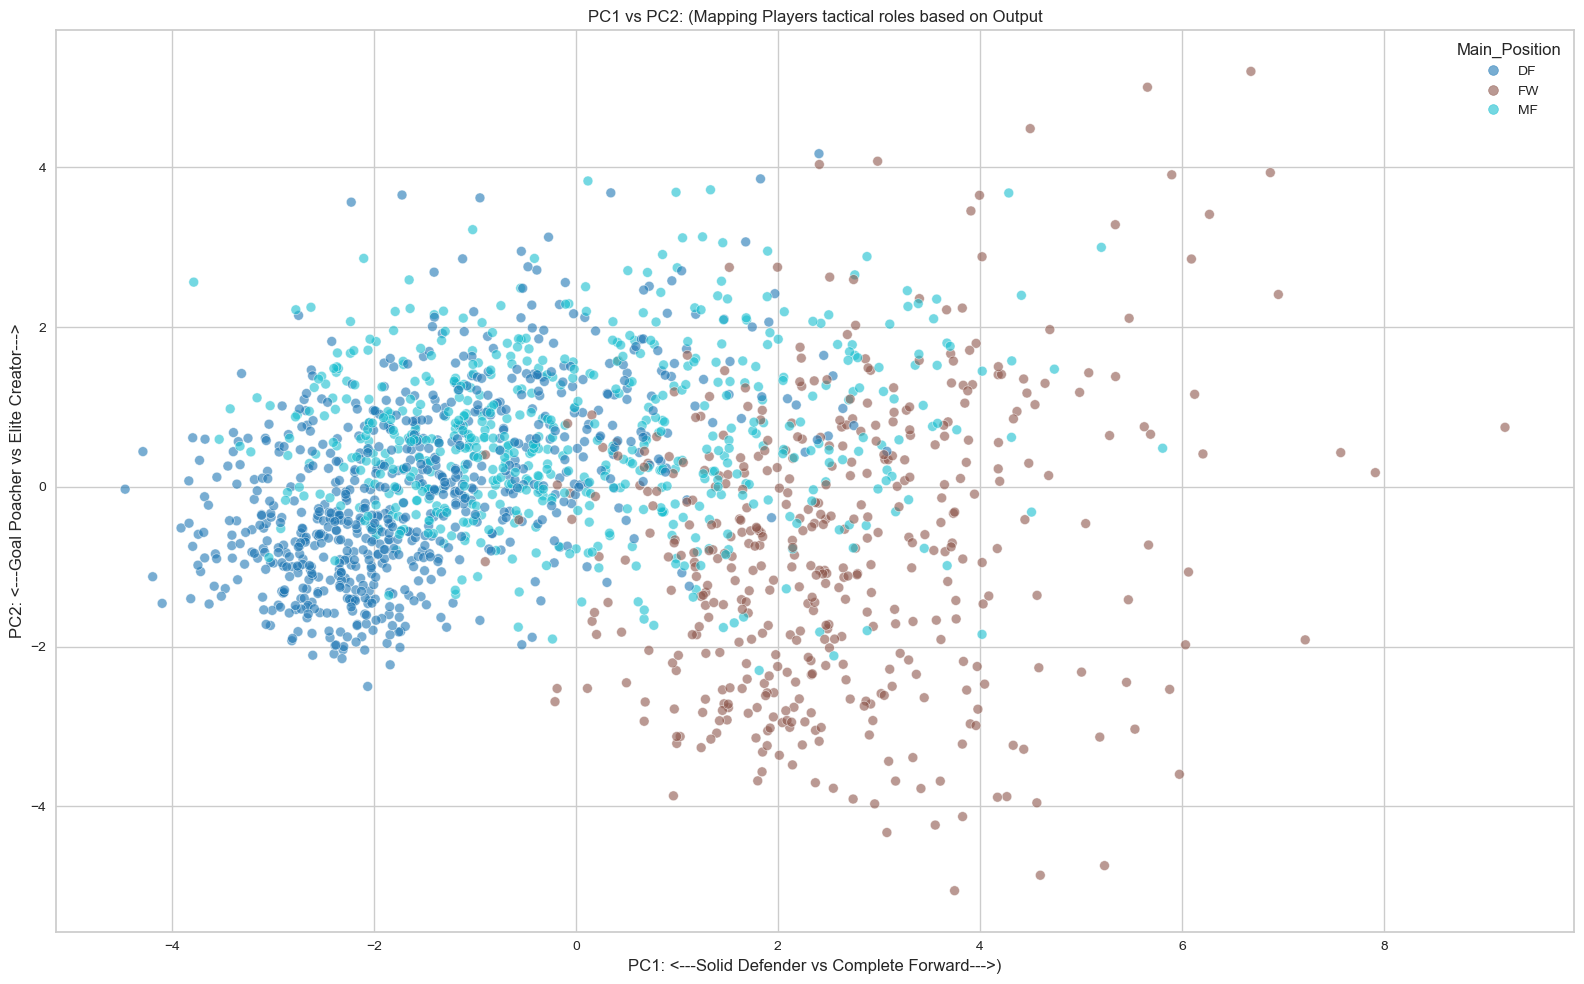

In [44]:
#plot PC1 vs PC2 

plt.figure(figsize=(16, 10))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], 
                      c=y_encoded, 
                      cmap='tab10', 
                      alpha=0.6, 
                      s=50,
                      edgecolor='white', 
                      linewidth=0.5)

plt.title('PC1 vs PC2: (Mapping Players tactical roles based on Output')
plt.xlabel('PC1: <---Solid Defender vs Complete Forward--->)', fontsize=12)
plt.ylabel('PC2: <---Goal Poacher vs Elite Creator--->', fontsize=12)
plt.legend(scatter.legend_elements()[0], position_encoder.classes_, title="Main_Position")
plt.tight_layout()
plt.savefig('1_pc1 vs pc2.png', dpi=300, bbox_inches='tight')
plt.show()

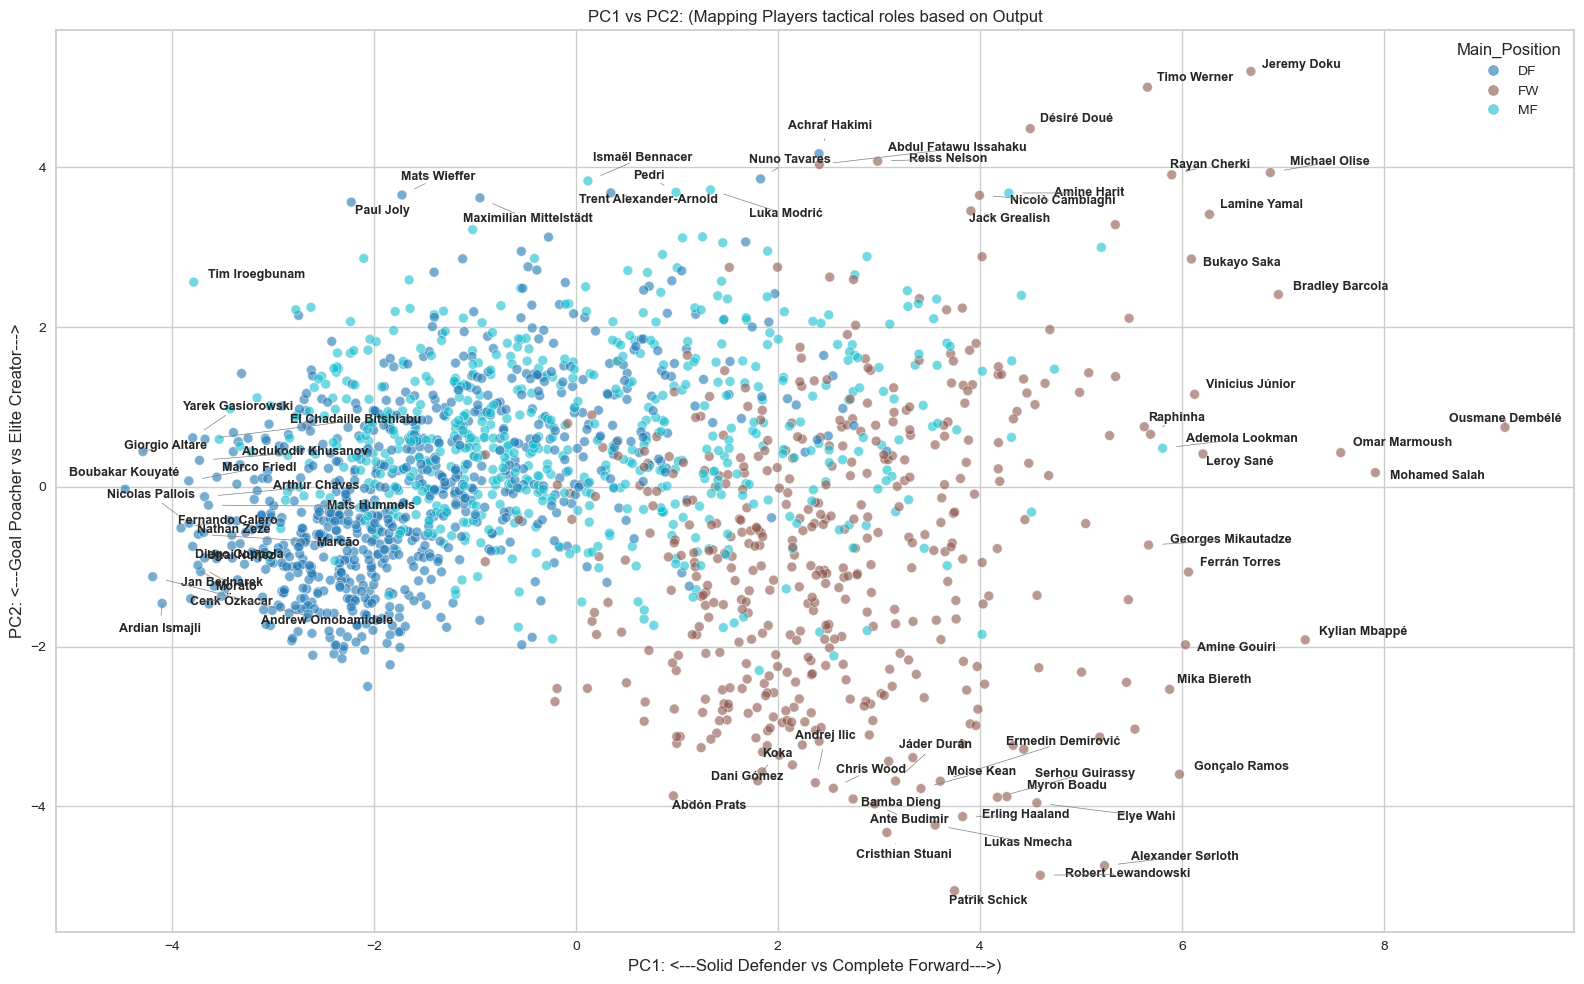

In [43]:
#add player names to make a clearer image
from adjustText import adjust_text  

plt.figure(figsize=(16, 10))

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], 
                      c=y_encoded, 
                      cmap='tab10', 
                      alpha=0.6, 
                      s=50,
                      edgecolor='white', 
                      linewidth=0.5)
texts = []
player_names = main_dataset['Player'].values

indices_to_label = set()
indices_to_label.update(X_pca[:, 0].argsort()[:20])  
indices_to_label.update(X_pca[:, 0].argsort()[-20:])  
indices_to_label.update(X_pca[:, 1].argsort()[:20])   
indices_to_label.update(X_pca[:, 1].argsort()[-20:])  

for i in indices_to_label:
    texts.append(plt.text(X_pca[i, 0], X_pca[i, 1], player_names[i], 
                          fontsize=9, fontweight='bold'))
#installed and use adjusttext library to avoid overlapping of player names
adjust_text(texts, 
            arrowprops=dict(arrowstyle='-', color='gray', lw=0.5, shrinkA=10, shrinkB=10),           
            force_points=0.2, 
            force_text=0.5, 
            expand_points=(1.2, 1.2))

plt.title('PC1 vs PC2: (Mapping Players tactical roles based on Output')
plt.xlabel('PC1: <---Solid Defender vs Complete Forward--->)', fontsize=12)
plt.ylabel('PC2: <---Goal Poacher vs Elite Creator--->', fontsize=12)
plt.legend(scatter.legend_elements()[0], position_encoder.classes_, title="Main_Position")
plt.tight_layout()
plt.show()

In [35]:
#KMeans

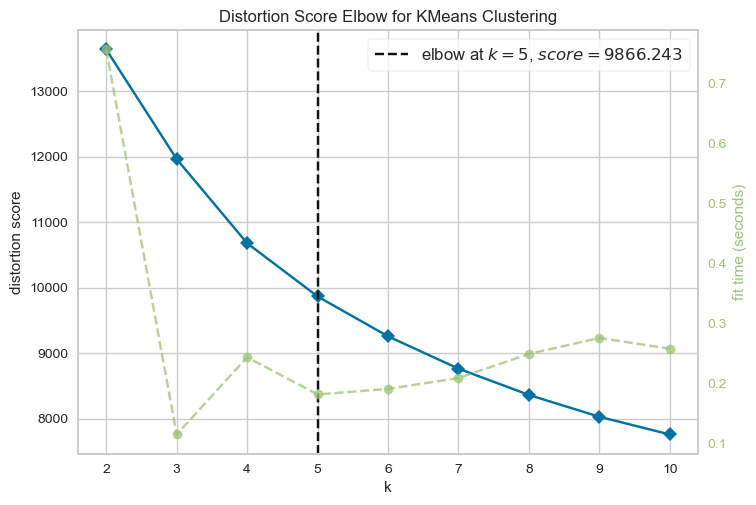


The Elbow Method suggests: k = 5
Elbow score: 9866.24


In [37]:
# using elbow method to find number of clusters needed
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
Elbow_M = KElbowVisualizer(KMeans(random_state=42, n_init=10), k=10)
Elbow_M.fit(X_pca)    
plt.savefig('elbow_method_clusters needed.png', dpi=300, bbox_inches='tight')

Elbow_M.show()

print(f"\nThe Elbow Method suggests: k = {Elbow_M.elbow_value_}")
print(f"Elbow score: {Elbow_M.elbow_score_:.2f}")

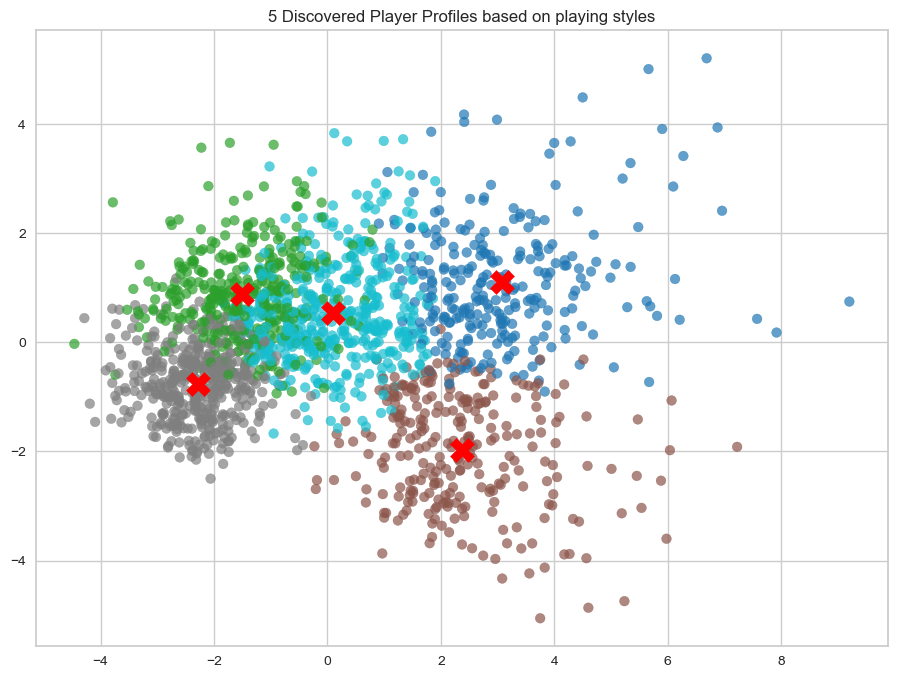

In [38]:
#plot K-Means to show how players are clustered together

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
main_dataset['tactical_roles'] = kmeans.fit_predict(X_pca)

plt.figure(figsize=(11,8))
plt.scatter(X_pca[:,0], X_pca[:,1], c=main_dataset['tactical_roles'], cmap='tab10', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='red', marker='X')
plt.title('5 Discovered Player Profiles based on playing styles')
plt.show()


In [39]:
#show what features are the driving force behind each palyer clusters to
#define specific player roles
print("Player Profiles:")
print('\n')
print(main_dataset.groupby('tactical_roles')[features].mean().T.round(3))


Player Profiles:


tactical_roles                       0       1       2       3       4
Goals_Per_90                     0.242   0.056   0.388   0.038   0.081
Expected_Goals_Per_90            0.236   0.068   0.388   0.044   0.089
Assists_Per_90                   0.233   0.061   0.103   0.023   0.109
Exp_Assisted_Goals_Per_90        0.220   0.071   0.107   0.025   0.114
Progressive_Passes_90            3.878   3.975   2.006   3.106   4.627
Progressive_Carries_90           3.740   1.374   1.534   0.633   1.861
Progressive_Passes_Received_90   8.373   2.595   5.505   0.642   3.827
Tackles_Won_Per_90               0.831   1.581   0.480   0.920   1.029
Interceptions_Per_90             0.457   1.142   0.251   1.134   0.760
Blocks_Per_90                    0.887   1.445   0.673   1.250   0.951
Clearances_Per_90                0.766   2.318   0.823   4.605   1.759
Yellow_Cards_90                  0.148   0.291   0.194   0.197   0.176
Age                             24.212  24.064  25.799  26

In [40]:
# rename the clusters names based on the archetype stats
playing_style = {
    0: 'Elite Creator/Winger',          
    1: 'Ball-Winning Midfielder',
    2: 'Goal Poacher',         
    3: 'Elite Centerback',    
    4: 'Deep-Lying Playmaker'}

main_dataset['Player_Profile'] = main_dataset['tactical_roles'].map(playing_style)


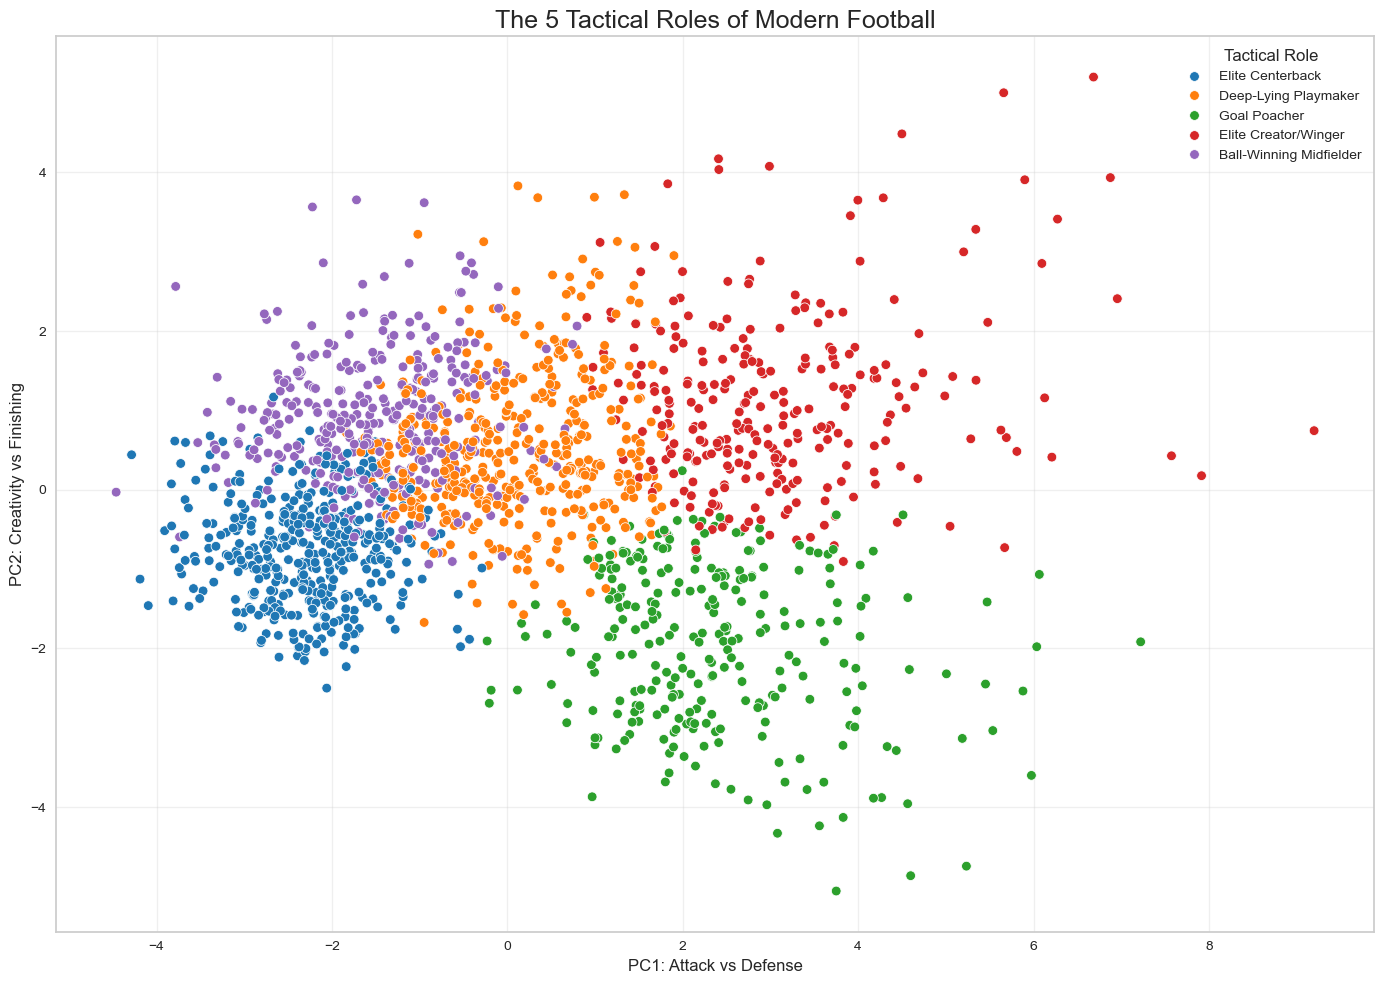

In [41]:
#plot K-means cluster, with new cluster names
plt.figure(figsize=(14, 10))

sns.scatterplot(
    x=X_pca[:, 0], 
    y=X_pca[:, 1], 
    hue=main_dataset['Player_Profile'], 
    palette='tab10')

plt.title('The 5 Tactical Roles of Modern Football', fontsize=18)
plt.xlabel('PC1: Attack vs Defense', fontsize=12)
plt.ylabel('PC2: Creativity vs Finishing', fontsize=12)
plt.legend(title='Tactical Role')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

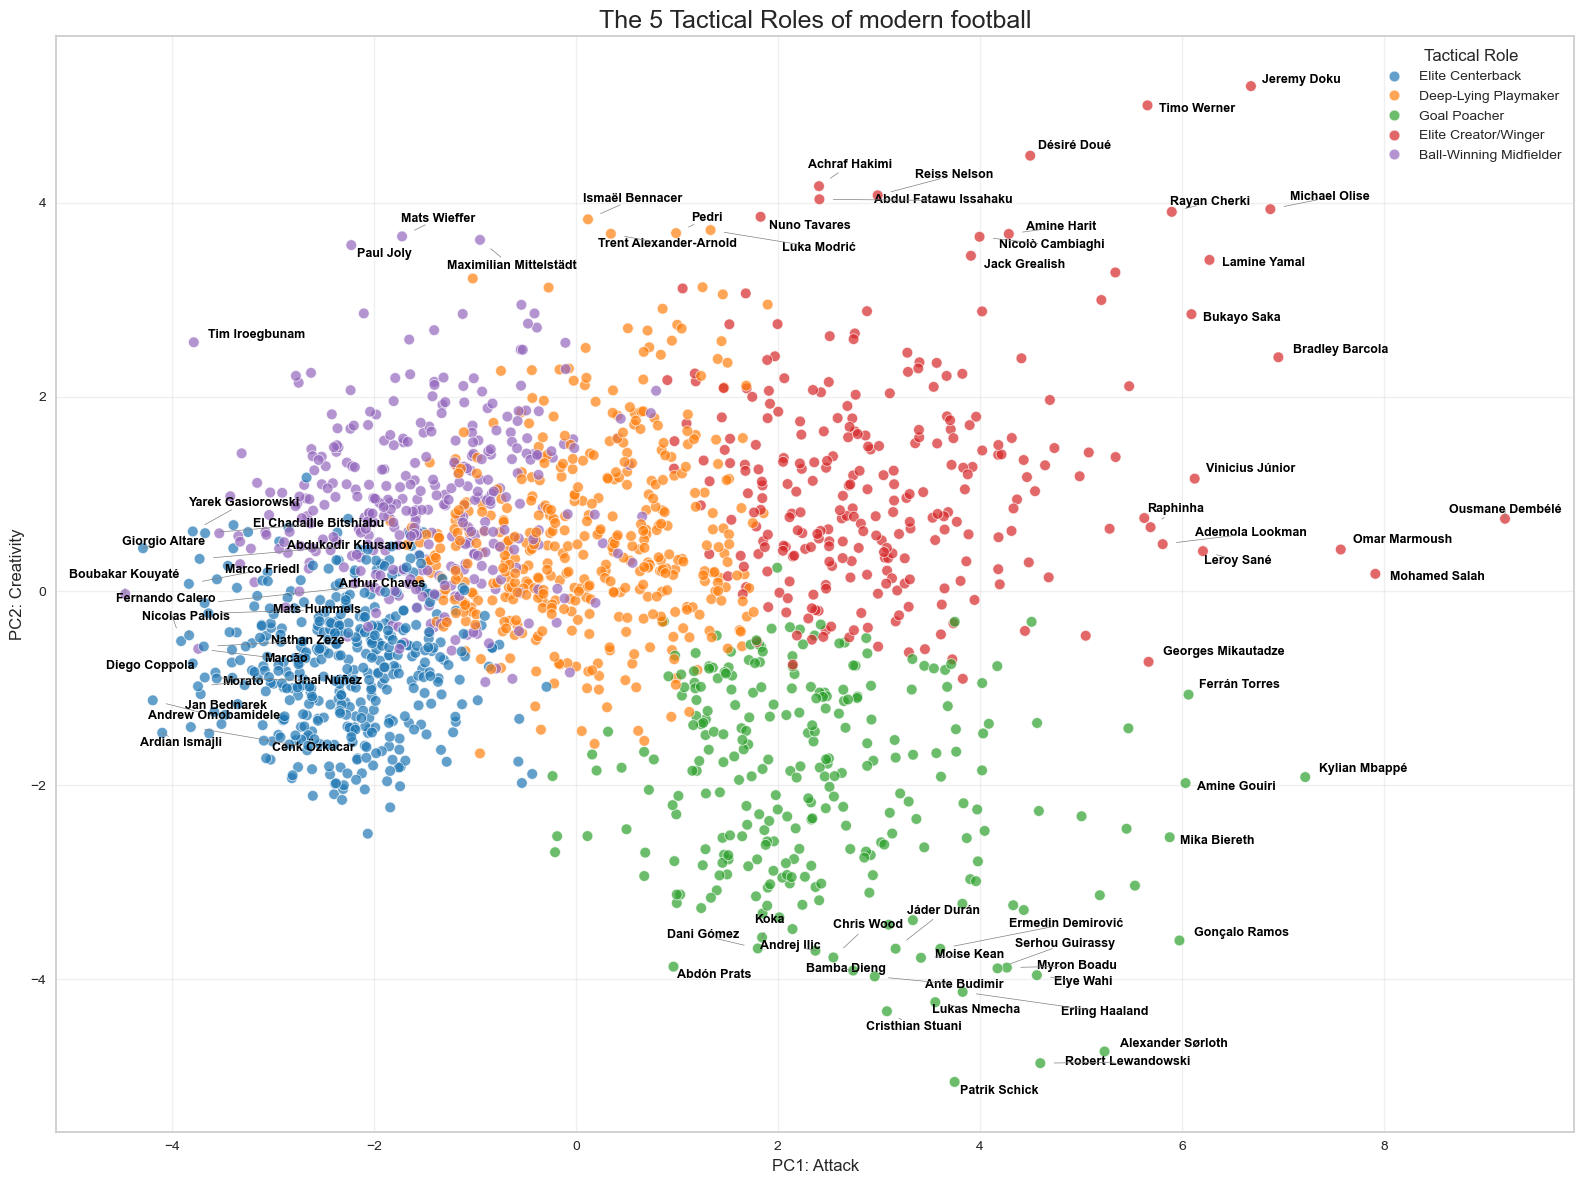

In [45]:
#label K-Means cluster with player names
plt.figure(figsize=(16, 12))

scatter = sns.scatterplot(
    x=X_pca[:, 0], 
    y=X_pca[:, 1], 
    hue=main_dataset['Player_Profile'], 
    palette='tab10',
    alpha=0.7,
    s=60
)

texts = []
player_names = main_dataset['Player'].values
indices_to_label = set()

indices_to_label.update(X_pca[:, 0].argsort()[-20:])

indices_to_label.update(X_pca[:, 0].argsort()[:20])

indices_to_label.update(X_pca[:, 1].argsort()[-20:])

indices_to_label.update(X_pca[:, 1].argsort()[:20])

for i in indices_to_label:
    texts.append(plt.text(X_pca[i, 0], X_pca[i, 1], player_names[i], 
                          fontsize=9, fontweight='bold', color='black'))

adjust_text(texts, 
            arrowprops=dict(arrowstyle='-', color='gray', lw=0.5, shrinkA=10, shrinkB=10),
            force_points=0.2,
            force_text=0.5,
            expand_points=(1.2, 1.2))

plt.title('The 5 Tactical Roles of modern football', fontsize=18)
plt.xlabel('PC1: Attack', fontsize=12)
plt.ylabel('PC2: Creativity', fontsize=12)

plt.legend(title='Tactical Role')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('1_20_kmeans_cluster.png', dpi=300, bbox_inches='tight')

plt.show()